In [29]:
using DataFrames, CSV, LinearAlgebra, Gadfly, Statistics, GLM

# Exercice 1

In [13]:
# charger les données
Data = CSV.read("viscosite.csv")
y = convert(Array{Float64},Data[:Visc])
x = convert(Array{Float64},Data[:Temp])
n = length(y)

8

## a) Tracer la résistance au cisaillement en fonction de la température

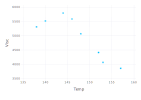

In [5]:
plot(Data, x=:Temp, y=:Visc, Geom.point)

## b) Estimer les paramètres du modèle de régression linéaire

et le coefficient de détermination ajusté

Le coefficient de détermination ajusté est 0.7341035339029547


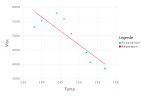

In [25]:
# Construction de la matrice de structure
X = hcat(ones(n),x)

# nombre de variables explicatives
p = size(X,2)-1

# Estimation des coefficients de régression
β̂ = (X'X)\X'y

# Calcul des résidus
e = y-X*β̂

# Calcul du coefficient de détermination ajusté
ȳ = mean(y)
SST = sum( (y[i]-ȳ)^2 for i=1:n )
SSE = sum( e[i]^2 for i=1:n )

R² = 1 - SSE/SST*(n-1)/(n-p)

println("Le coefficient de détermination ajusté est $R²")


sample = layer(Data, x=:Temp, y=:Visc, Geom.point, Theme(default_color="deepskyblue"))
# droite de régression définie sur le domaine des données
regression = layer(x=x, y = X*β̂, Geom.line, Theme(default_color="red"))

plot(sample,regression,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]))

## c) Estimer les paramètres du modèle de régression quadratique

et le coefficient de détermination ajusté

Le coefficient de détermination ajusté est 0.8627173272489974


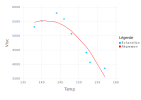

In [27]:
# Construction de la matrice de structure
X = hcat(ones(n),x,x.^2)

# nombre de variables explicatives
p = size(X,2)-1

# Estimation des coefficients de régression
β̂ = (X'X)\X'y

# Calcul des résidus
e = y-X*β̂

# Calcul du coefficient de détermination ajusté
ȳ = mean(y)
SST = sum( (y[i]-ȳ)^2 for i=1:n )
SSE = sum( e[i]^2 for i=1:n )

R² = 1 - SSE/SST*(n-1)/(n-p)

println("Le coefficient de détermination ajusté est $R²")


sample = layer(Data, x=:Temp, y=:Visc, Geom.point, Theme(default_color="deepskyblue"))
# droite de régression définie sur le domaine des données
regression = layer(x=x, y = X*β̂, Geom.line, Theme(default_color="red"))

plot(sample,regression,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]))

## d) Estimer les paramètres du modèle de régression cubique

et le coefficient de détermination ajusté

Le coefficient de détermination ajusté est 0.9770957058871033


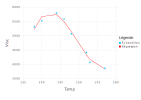

In [28]:
# Construction de la matrice de structure
X = hcat(ones(n),x,x.^2,x.^3)

# nombre de variables explicatives
p = size(X,2)-1

# Estimation des coefficients de régression
β̂ = (X'X)\X'y

# Calcul des résidus
e = y-X*β̂

# Calcul du coefficient de détermination ajusté
ȳ = mean(y)
SST = sum( (y[i]-ȳ)^2 for i=1:n )
SSE = sum( e[i]^2 for i=1:n )

R² = 1 - SSE/SST*(n-1)/(n-p)

println("Le coefficient de détermination ajusté est $R²")


sample = layer(Data, x=:Temp, y=:Visc, Geom.point, Theme(default_color="deepskyblue"))
# droite de régression définie sur le domaine des données
regression = layer(x=x, y = X*β̂, Geom.line, Theme(default_color="red"))

plot(sample,regression,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]))

## Estimation de la régression linéaire avec le package GLM

In [33]:
M₁ = lm(@formula(Visc ~ Temp), Data)

e = residuals(M₁)

R² = 1 - sum(e.^2)/SST
println("Le coefficient de détermination est $R²")

Le coefficient de détermination est 0.734103533902955


# Exercice 2

In [36]:
# Chargement des données
Data = CSV.read("PS3games.csv")
first(Data,5)

5×6 DataFrame. Omitted printing of 3 columns
│ Row │ Name                           │ Year_of_Release │ Global_Sales │
│     │ Union{Missing, String}         │ String⍰         │ Float64⍰     │
├─────┼────────────────────────────────┼─────────────────┼──────────────┤
│ 1   │ Grand Theft Auto V             │ 2013            │ 21.04        │
│ 2   │ Call of Duty: Black Ops II     │ 2012            │ 13.79        │
│ 3   │ Call of Duty: Modern Warfare 3 │ 2011            │ 13.32        │
│ 4   │ Call of Duty: Black Ops        │ 2010            │ 12.63        │
│ 5   │ Gran Turismo 5                 │ 2010            │ 10.7         │

## a) Affichage des ventes en fonction du score des critiques

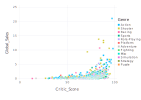

In [35]:
plot(Data,x=:Critic_Score, y=:Global_Sales, color=:Genre, Geom.point)

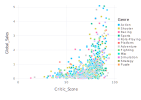

In [38]:
plot(Data,x=:Critic_Score, y=:Global_Sales, color=:Genre, Geom.point,
Coord.cartesian(ymin=0, ymax=5))

## b) Tentons de linéariser la relation

In [41]:
Data[:Global_Sales_Transformed] = log.(Data[:Global_Sales]);

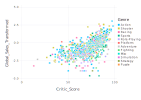

In [40]:
plot(Data,x=:Critic_Score, y=:Global_Sales_Transformed, color=:Genre, Geom.point)

## c) Estimation des paramètres du modèle de régression

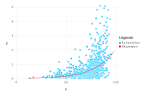

In [53]:
y = convert(Array{Float64},Data[:Global_Sales_Transformed])
x₁ = convert(Array{Float64},Data[:Critic_Score])
n = length(y)

# Définition de la matrice de structure
X = hcat(ones(n),x₁)

# estimation des coefficients
β̂ = (X'X)\X'*y


sample = layer(Data, x=:Critic_Score, y=:Global_Sales, Geom.point, Theme(default_color="deepskyblue"))
# droite de régression définie sur le domaine des données
regression = layer(x=x₁, y = exp.(X*β̂), Geom.line, Theme(default_color="red"))

plot(regression,sample,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]),
    Coord.cartesian(ymin=0, ymax=5))



## d) Incorporation du score des joueurs

In [57]:
x₁ = convert(Array{Float64},Data[:Critic_Score])
x₂ = convert(Array{Float64},Data[:User_Score])
n = length(y)

# Définition de la matrice de structure
X = hcat(ones(n),x₁,x₂)

# Calcul des valeurs propres de la matrice de structure
λ = eigvals(X'X)

# Calcul de l'indice de multicolinéarité
ϕ = [sqrt(maximum(λ)/λ[i]) for i=1:length(λ)]
if any(ϕ.>30)
    println("Il y a multicolinéarité.")
else
    println("Il ne semble pas y avoir de multicolinéarité.")
end
println("ϕ = $ϕ")

Il y a multicolinéarité.
ϕ = [407.754, 61.9779, 1.0]


## e) Sélection du meilleur modèle de régression

In [68]:
ỹ = convert(Array{Float64},Data[:Global_Sales_Transformed])
SST = sum( (ỹ[i] - mean(ỹ))^2 for i=1:n )

# Définition de la matrice de structure du modèle 1
X = hcat(ones(n),x₁)
# estimation des coefficients
β̂ = (X'X)\X'*ỹ
# Calcul du R²
e = ỹ - X*β̂
R² = 1-sum(e[i]^2 for i=1:n)/SST
println("Le coefficient de détermination du modèle avec le score des critiques est $R²")

# Définition de la matrice de structure du modèle 1
X = hcat(ones(n),x₂)
# estimation des coefficients
β̂ = (X'X)\X'*ỹ
# Calcul du R²
e = ỹ - X*β̂
R² = 1-sum(e[i]^2 for i=1:n)/SST
println("Le coefficient de détermination du modèle avec le score des critiques est $R²")


Le coefficient de détermination du modèle avec le score des critiques est 0.3422910081656688
Le coefficient de détermination du modèle avec le score des critiques est 0.10613537706802412


In [ ]:
plot(Data,x=:User_Score, y=:Global_Sales, color=:Genre, Geom.point)

In [ ]:
Y = convert(Array{Float64},Data[:Global_Sales])

# matrice des variables explicatives sans ordonnée à l'origine
X̃ = convert(Matrix{Float64},Data[:,[:Critic_Score,:User_Score]])

n = length(Y)
X = hcat(ones(n),X̃)

In [ ]:
ind = Data[:Genre] .== "Action"
df = Data[ind,:]
plot(df,x=:User_Score, y=:Global_Sales, Geom.point, Coord.cartesian(ymin=0, ymax=5) )


In [ ]:
x = df[:User_Score]
y= df[:Global_Sales]
plot(x=x,y=log.(y),Geom.point)

In [ ]:
n = length(y)
X = hcat(ones(n),x)
β̂ = (X'X)\X'*log.(y)

sample = layer(x=x,y=log.(y), Geom.point, Theme(default_color="deepskyblue"))
regression = layer(x=x, y=X*β̂, Geom.line, Theme(default_color="red"))
plot(sample,regression,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]),
    Coord.Cartesian(xmin=2.5,xmax=10), Guide.xlabel("Émissions FF"), Guide.ylabel("T"))

In [ ]:
sample = layer(x=x,y=y, Geom.point, Theme(default_color="deepskyblue"))
regression = layer(x=x, y=exp.(X*β̂), Geom.line, Theme(default_color="red"))
plot(sample,regression,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]),
    Coord.Cartesian(xmin=2.5,xmax=10, ymin=0, ymax=5), Guide.xlabel("Émissions FF"), Guide.ylabel("T"))

In [ ]:
λ = eigvals(X'X)

In [ ]:
ϕ = [maximum(λ)/λ[i] for i=1:length(λ)]
if any(ϕ.>30)
    println("Il y a multicolinéarité.")
else
    println("Il ne semble pas y avoir de multicolinéarité.")
end
println("ϕ = $ϕ")